# Example Data Notebook for TAQ Database


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import collections
from itertools import chain
import matplotlib.pyplot as plt
import configobj


from data_preprocessing.query_helpers import client_connection
from data_preprocessing.preprocess import clean_trades,clean_quotes,chunk_clean


### Personal Details

Access information will be stored within an env file

In [6]:
config = configobj.ConfigObj(".env")
host = config["host"]
server_user = config["server_user"]
server_password = config["server_password"]
db_user = config["db_user"]
db_pass = config["db_pass"]


### Setup the client connection to the DB

In [7]:
conn = client_connection(
   host,server_user,server_password,db_user,db_pass
)

### Example Trade Query

Includes support for multiple exchanges  (Required by the Order Protection Rule)

In [8]:
exchange="'N'"
symbol='AAPL'
start= "2022-01-01"
end="2022-01-10"


In [9]:
result,path=conn.client_get_trades(exchange,symbol,start,end)

INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_8.2p1)


Trade Query for 'N' AAPL 2022-01-01 2022-01-10


INFO:paramiko.transport:Authentication (password) successful!
INFO:paramiko.transport.sftp:[chan 1] Opened sftp connection (server version 3)


In [10]:
trades=pd.read_csv(path)
trades=clean_trades(trades)
trades

,SIP_Timestamp,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Trade_Through_Exempt_Indicator,date
2022-01-03 09:30:02.640469,2022-01-03 09:30:02.640840,N,AAPL,1,177.82,@ I,N,0,125318,38,,0,2022-01-03
2022-01-03 09:30:02.640469,2022-01-03 09:30:02.640840,N,AAPL,99,177.81,@ I,N,0,125319,39,,0,2022-01-03
2022-01-03 09:30:03.192701,2022-01-03 09:30:03.193069,N,AAPL,10,177.88,@ I,N,0,126520,40,,0,2022-01-03
2022-01-03 09:30:03.348215,2022-01-03 09:30:03.348582,N,AAPL,1,177.86,@ I,N,0,126765,41,,0,2022-01-03
2022-01-03 09:30:03.382234,2022-01-03 09:30:03.382602,N,AAPL,1,177.84,@ I,N,0,126846,42,,0,2022-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07 15:59:58.008136,2022-01-07 15:59:58.008505,N,AAPL,100,172.04,@F,N,0,6331620,9723,,1,2022-01-07
2022-01-07 15:59:59.005799,2022-01-07 15:59:59.006168,N,AAPL,100,172.04,@F,N,0,6334172,9724,,1,2022-01-07
2022-01-07 15:59:59.027786,2022-01-07 15:59:59.028155,N,AAPL,100,172.06,@F,N,0,6334234,9725,,1,2022-01-07
2022-01-07 15:59:59.903259,2022-01-07 15:59:59.903627,N,AAPL,100,172.17,@,N,0,6336236,9726,,0,2022-01-07


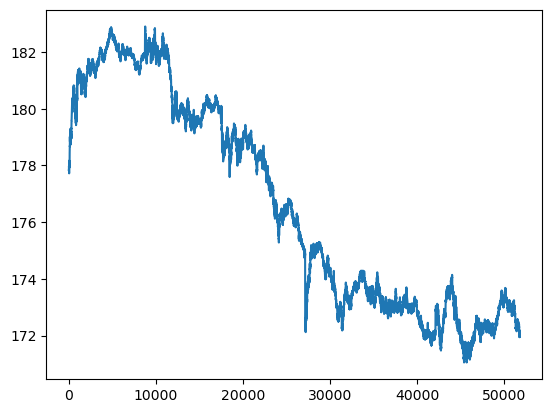

In [11]:
plt.plot(trades['Trade_Price'].values)

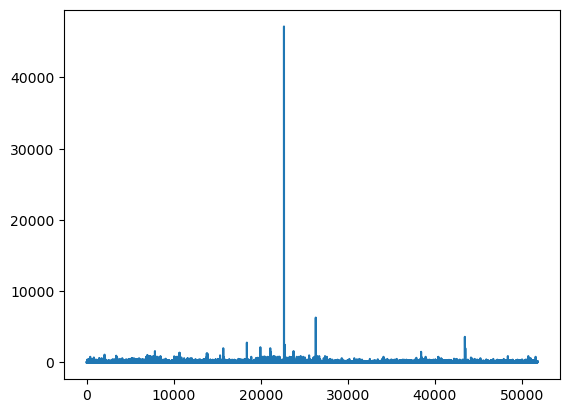

In [12]:
plt.plot(trades['Trade_Volume'].values)

### Example Quote Query

Includes support for multiple exchanges (Required by the Order Protection Rule)

In [13]:
exchange="'N'"
symbol='AAPL'
start= "2022-01-01"
end="2022-01-03"

In [14]:
conn = client_connection(
   host,server_user,server_password,db_user,db_pass
)

### Loop through multiple days without server timeout

This will save the data in a csv file one directory above 

In [15]:
conn.get_quotes_range(exchange,symbol,start,end)

[]

### Examine Reconstructed Event Book

- This examines the reconstructed event book
- One can generate the features from the raw data (with cleaning and reconstruction) via one command

In [13]:
import pandas as pd

events=pd.read_csv('data/features/2020-01-02/AMZN_reconstructed_features.csv', index_col=0,nrows=100).head(50)
events

,Date,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Correction_Indicator,Sequence_Number,Trade_Id,...,Trade_Side,MOX_Identifier,Price_Impact,Imbalance_Weighted_Effective_Spread_BBO,Effective_Spread_BBO,Prevailing_Best_Bid_Price,Prevailing_Best_Bid_Size,Prevailing_Best_Offer_Price,Prevailing_Best_Offer_Size,Midprice_BBO
index,,,,,,,,,,,,,,,,,,,,,
2020-01-02 09:30:00.100931,2020-01-02,V,AMZN,1.0,1873.9700,@ I,N,0.0,19784,1.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02 09:30:00.100931,2020-01-02,V,AMZN,1.0,1873.9700,@ I,N,0.0,19785,2.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02 09:30:00.121000,2020-01-02,D,AMZN,1.0,1873.0003,@ I,N,0.0,19793,137.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02 09:30:00.121087,2020-01-02,K,AMZN,1.0,1874.7900,@F I,N,0.0,19782,630.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02 09:30:00.121211,2020-01-02,P,AMZN,1.0,1874.7900,@F I,N,0.0,19788,714.0,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02 09:30:00.121211,2020-01-02,P,AMZN,1.0,1874.7900,@ Q,N,0.0,19789,715.0,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02 09:30:00.121315,2020-01-02,P,AMZN,1.0,1873.4000,@ I,N,0.0,19790,716.0,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02 09:30:00.121358,2020-01-02,K,AMZN,5.0,1874.0200,@ I,N,0.0,19786,631.0,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02 09:30:00.121362,2020-01-02,Z,AMZN,5.0,1874.0200,@ I,N,0.0,19787,30.0,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
events['MOX_Identifier']

index
2020-01-02 09:30:00.100931     0.0
2020-01-02 09:30:00.100931     0.0
2020-01-02 09:30:00.121000     1.0
2020-01-02 09:30:00.121087     2.0
2020-01-02 09:30:00.121211     3.0
2020-01-02 09:30:00.121211     3.0
2020-01-02 09:30:00.121315     4.0
2020-01-02 09:30:00.121358     5.0
2020-01-02 09:30:00.121362     6.0
2020-01-02 09:30:00.122000     7.0
2020-01-02 09:30:00.169976     8.0
2020-01-02 09:30:00.170423     9.0
2020-01-02 09:30:00.231129    10.0
2020-01-02 09:30:00.231129    10.0
2020-01-02 09:30:00.518414    11.0
2020-01-02 09:30:00.764034    12.0
2020-01-02 09:30:00.764034    12.0
2020-01-02 09:30:00.764034    12.0
2020-01-02 09:30:00.764213    13.0
2020-01-02 09:30:00.764435    14.0
2020-01-02 09:30:00.764584    15.0
2020-01-02 09:30:00.764782    16.0
2020-01-02 09:30:00.764782    16.0
2020-01-02 09:30:00.765747    17.0
2020-01-02 09:30:00.765747    17.0
2020-01-02 09:30:00.765747    17.0
2020-01-02 09:30:00.772000    18.0
2020-01-02 09:30:00.772484    19.0
2020-01-02 09: